# Подключение библиотек

In [1]:
from catboost import CatBoostRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as mape
import matplotlib.pyplot as plt
import yfinance

In [2]:
def draw_plot(X, y):
    plt.plot(X, y, color='b')
    plt.scatter(X, y, color='b')
    plt.grid(1)

In [3]:
def func_need_short():
    global need_short
    shr = need_short
    if shr != 0 and shr != -1:
        shr = 0
    return shr

# Настройки модели

In [4]:
time_frame = '1mo'
period = 'max'
ticket_name = 'SBER.ME'
commission = 0.0002
# need_short = 0 если нельзя шорти
# need_short = -1 если нельзя шорти
need_short = 0
if need_short != 0 and need_short != -1:
    need_short = 0
mod = CatBoostRegressor()

# Получение данных

In [5]:
tiker = yfinance.Ticker(ticket_name)
tiker.info

{'zip': '117312',
 'sector': 'Financial Services',
 'fullTimeEmployees': 287866,
 'longBusinessSummary': 'Sberbank of Russia, together with its subsidiaries, provides corporate and retail banking products and services to individuals, small businesses, corporate clients, and financial institutions. The company offers deposit products; pension accounts; payment, transfer, brokerage, and asset management services; car, housing, education, and consumer loans; mortgages; debit and credit cards, and overdraft service; and refinancing products. It also provides derivative, financial instrument, foreign currency, precious metal, corporate structured, and commodities and securities products, as well as debt and capital markets funding, documentary, and other commission services. In addition, it offers life, property, bank card, accident, liability, trust management, investment and universal life, travel, and mutual investment funds insurance products, as well as individual pension plans and cor

In [6]:
df = tiker.history(interval=time_frame, period=period)
df = df.dropna()
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-12-01,48.366878,66.690299,41.888298,43.082008,6.585841e+09,0.0,0
2012-01-01,43.082009,56.513936,31.530170,48.925751,5.237760e+09,0.0,0
2012-02-01,48.969166,88.415794,15.564870,54.145519,5.040133e+09,0.0,0
2012-03-01,53.233962,64.201969,0.541835,51.622456,4.546695e+09,0.0,0
2012-04-01,51.763518,53.299062,49.452065,50.884514,2.332887e+09,0.0,0
...,...,...,...,...,...,...,...
2022-02-01,269.720001,282.299988,89.589996,130.500000,6.067441e+09,0.0,0
2022-03-01,130.500000,156.199997,122.000000,143.690002,4.767789e+08,0.0,0
2022-04-01,145.000000,169.899994,111.900002,128.800003,1.391172e+09,0.0,0


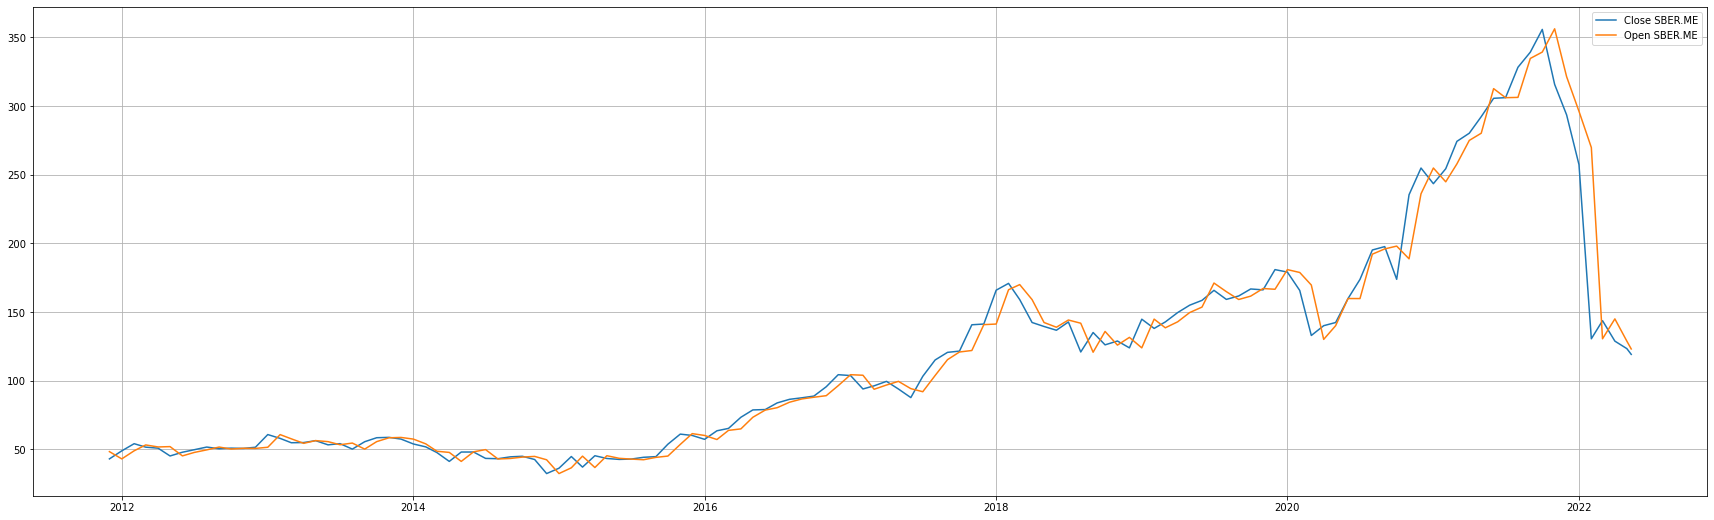

In [7]:
plt.figure(figsize=(30, 9))
plt.plot(df.index.values, df['Close'].values, label=f'Close {ticket_name}')
plt.plot(df.index.values, df['Open'].values, label=f'Open {ticket_name}')
plt.legend()
plt.grid(1)
plt.show()

In [8]:
data_frame = pd.DataFrame({'Open': df['Open'].values, 'Close': df['Close'].values})
"""
#date = []
close = np.array([])
open_ = np.array([])

for i in range(len(data_frame.index.values)):
    if i % 3 == 0 and i == len(data_frame.index.values)-1:
        break
    elif i % 3 == 0:
        #date.append(data_frame['Date'].values[i])
        open_ = np.append(open_, data_frame['Open'].values[i])
    elif i % 3 == 2 or i == len(data_frame.index.values)-1:
        close = np.append(close, data_frame['Close'].values[i])

data_frame = pd.DataFrame({'Open': open_, 'Close': close})
data_frame
"""

"\n#date = []\nclose = np.array([])\nopen_ = np.array([])\n\nfor i in range(len(data_frame.index.values)):\n    if i % 3 == 0 and i == len(data_frame.index.values)-1:\n        break\n    elif i % 3 == 0:\n        #date.append(data_frame['Date'].values[i])\n        open_ = np.append(open_, data_frame['Open'].values[i])\n    elif i % 3 == 2 or i == len(data_frame.index.values)-1:\n        close = np.append(close, data_frame['Close'].values[i])\n\ndata_frame = pd.DataFrame({'Open': open_, 'Close': close})\ndata_frame\n"

In [9]:
train, test = train_test_split(data_frame, test_size=0.33)
train = train.sort_index(ascending=True)
test = test.sort_index(ascending=True)

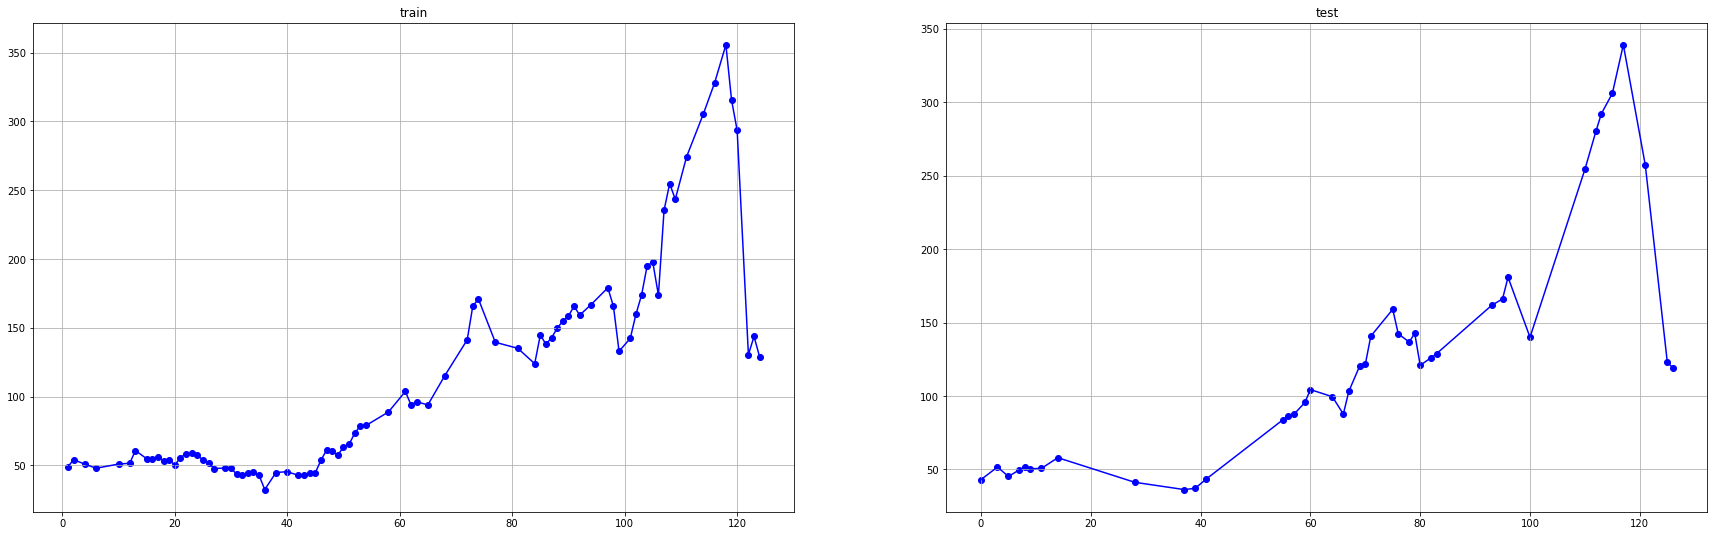

In [10]:
plt.figure(figsize=(30, 9))
plt.subplot(1, 2, 1)
draw_plot(train.index.values, train['Close'])
plt.title('train')
plt.subplot(1, 2, 2)
draw_plot(test.index.values, test['Close'])
plt.title('test')
plt.show()

# Обучение модели

In [11]:
X_train = np.array([
    train.index.values,
    train['Open'].values
]).T
y_train = np.array(train['Close'].values)

In [12]:
mod.fit(X_train, y_train)

Learning rate set to 0.027735
0:	learn: 76.1054066	total: 132ms	remaining: 2m 11s
1:	learn: 74.5291047	total: 133ms	remaining: 1m 6s
2:	learn: 73.1655609	total: 134ms	remaining: 44.5s
3:	learn: 71.8457323	total: 134ms	remaining: 33.5s
4:	learn: 70.5309331	total: 135ms	remaining: 26.9s
5:	learn: 69.2228176	total: 136ms	remaining: 22.5s
6:	learn: 67.8898652	total: 137ms	remaining: 19.4s
7:	learn: 66.5819613	total: 138ms	remaining: 17.1s
8:	learn: 65.3470697	total: 138ms	remaining: 15.2s
9:	learn: 64.1077780	total: 139ms	remaining: 13.7s
10:	learn: 62.9092069	total: 139ms	remaining: 12.5s
11:	learn: 61.7595755	total: 140ms	remaining: 11.5s
12:	learn: 60.7816497	total: 140ms	remaining: 10.7s
13:	learn: 59.7080084	total: 141ms	remaining: 9.93s
14:	learn: 58.6032938	total: 141ms	remaining: 9.29s
15:	learn: 57.5534002	total: 142ms	remaining: 8.74s
16:	learn: 56.5256200	total: 143ms	remaining: 8.25s
17:	learn: 55.5118662	total: 143ms	remaining: 7.81s
18:	learn: 54.5135283	total: 144ms	remainin

# Тестирование модели

In [13]:
X_test = np.array([
    test.index.values,
    test['Open'].values
]).T
y_test = np.array(test['Close'].values)
y_pred = mod.predict(X_test)
print('MAPE:', mape(y_test, y_pred) * 100, '%')

MAPE: 7.445564606596408 %


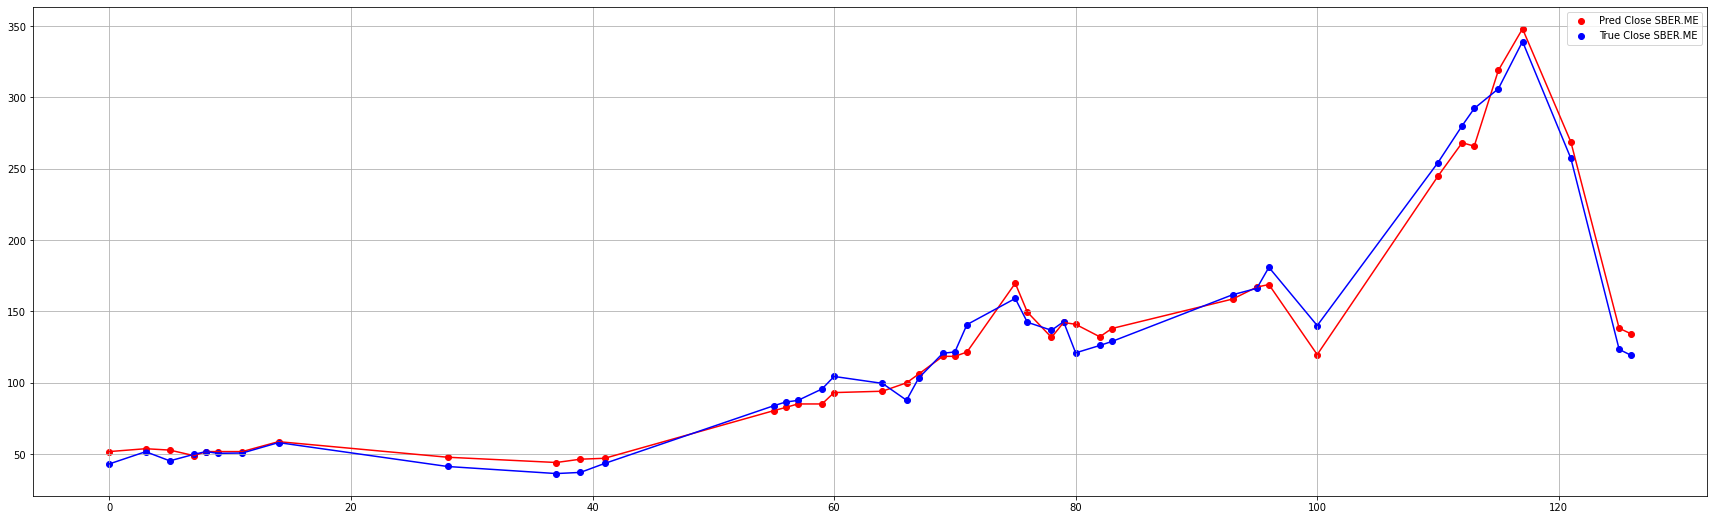

In [14]:
plt.figure(figsize=(30, 9))
plt.scatter(test.index.values, y_pred, color='r', label=f'Pred Close {ticket_name}')
plt.plot(test.index.values, y_pred, color='r')
plt.scatter(test.index.values, y_test, color='b', label=f'True Close {ticket_name}')
plt.plot(test.index.values, y_test, color='b')
plt.legend()
plt.grid(1)
plt.show()

# Проверка финаносовой устойчивости

In [15]:
need_buy = np.array([])
for i in range(len(y_pred)):
    if y_pred[i] * (1 + commission) > test['Open'].values[i]:
        need_buy = np.append(need_buy, 1)
    else:
        need_buy = np.append(need_buy, func_need_short())
r = test['Close'].values / test['Open'].values
r_real = np.cumprod(r)
r_strategi = np.array(r * need_buy)
for i in range(len(r_strategi)):
    if r_strategi[i] == 0 and i != 0:
        r_strategi[i] = 1
    elif r_strategi[i] == 0 and i == 0:
        r_strategi[i] = 1
r_strategi = np.cumprod(r_strategi)

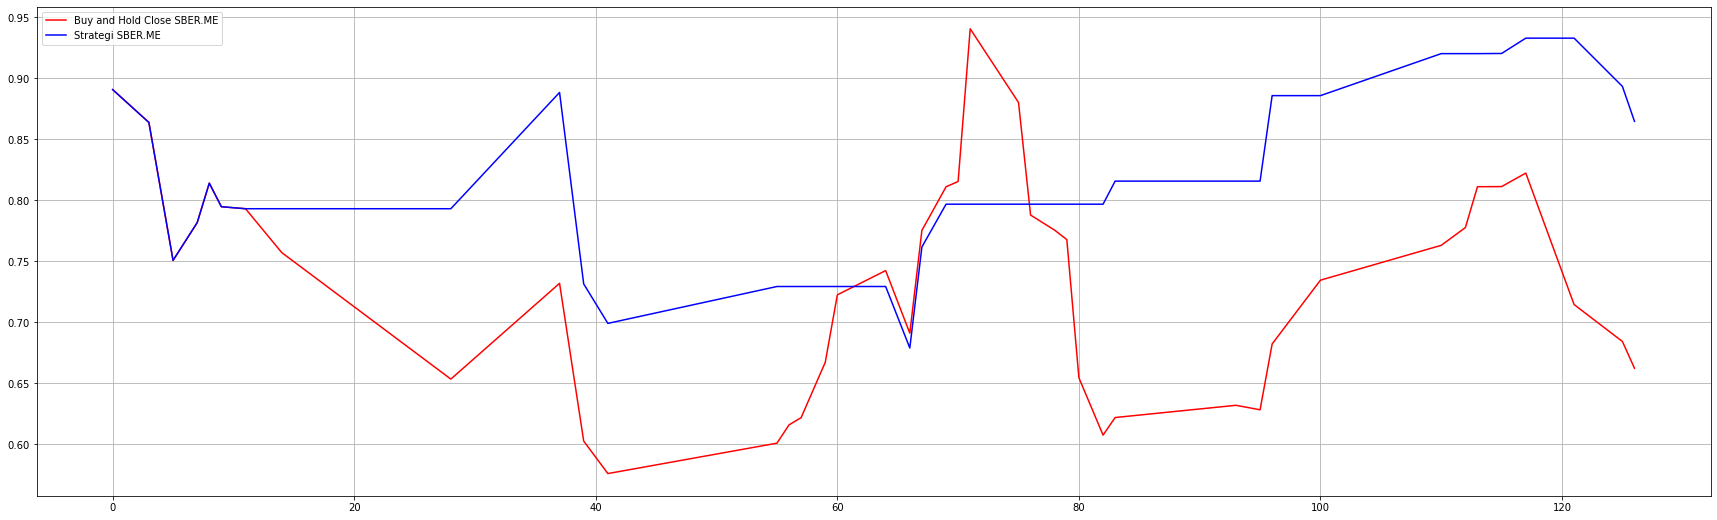

In [16]:
plt.figure(figsize=(30, 9))
plt.plot(test.index.values, r_real, color='r', label=f'Buy and Hold Close {ticket_name}')
plt.plot(test.index.values, r_strategi, color='b', label=f'Strategi {ticket_name}')
plt.grid(1)
plt.legend()
plt.show()

In [17]:
print(np.std(r_real), np.std(r_strategi))

0.0888347048232808 0.06898931335480506
